In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer

import warnings

warnings.filterwarnings('ignore')

In [157]:
train = pd.read_csv('data/diabetes.csv')

print(train['Outcome'].value_counts())
train.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [158]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [159]:
train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [160]:
features = train.columns.difference(['Outcome'])
label = 'Outcome'

X = train[features]
y = train[label]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 156, stratify = y)

In [162]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [163]:
pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [164]:
lr_clf.predict_proba(X_test)

array([[0.97821511, 0.02178489],
       [0.79163511, 0.20836489],
       [0.84505644, 0.15494356],
       [0.50582362, 0.49417638],
       [0.95476875, 0.04523125],
       [0.41165899, 0.58834101],
       [0.25591652, 0.74408348],
       [0.79616372, 0.20383628],
       [0.84895764, 0.15104236],
       [0.84440305, 0.15559695],
       [0.32173908, 0.67826092],
       [0.50115936, 0.49884064],
       [0.9344349 , 0.0655651 ],
       [0.58954686, 0.41045314],
       [0.78919355, 0.21080645],
       [0.87854604, 0.12145396],
       [0.24615275, 0.75384725],
       [0.5934442 , 0.4065558 ],
       [0.96414195, 0.03585805],
       [0.21492573, 0.78507427],
       [0.53764586, 0.46235414],
       [0.69850735, 0.30149265],
       [0.93185258, 0.06814742],
       [0.66023293, 0.33976707],
       [0.6565156 , 0.3434844 ],
       [0.88830402, 0.11169598],
       [0.08231035, 0.91768965],
       [0.3443838 , 0.6556162 ],
       [0.8296275 , 0.1703725 ],
       [0.18821144, 0.81178856],
       [0.

In [165]:
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
pred_proba

array([0.02178489, 0.20836489, 0.15494356, 0.49417638, 0.04523125,
       0.58834101, 0.74408348, 0.20383628, 0.15104236, 0.15559695,
       0.67826092, 0.49884064, 0.0655651 , 0.41045314, 0.21080645,
       0.12145396, 0.75384725, 0.4065558 , 0.03585805, 0.78507427,
       0.46235414, 0.30149265, 0.06814742, 0.33976707, 0.3434844 ,
       0.11169598, 0.91768965, 0.6556162 , 0.1703725 , 0.81178856,
       0.20077352, 0.20550993, 0.13986973, 0.23133684, 0.15172807,
       0.70463212, 0.2789944 , 0.68435564, 0.80784349, 0.6081124 ,
       0.40816533, 0.33910689, 0.65039279, 0.25119393, 0.31266157,
       0.04204718, 0.76027907, 0.13035439, 0.48978132, 0.29485203,
       0.34285547, 0.82620245, 0.84770508, 0.08554226, 0.15878218,
       0.31509121, 0.09992744, 0.3665167 , 0.39401652, 0.40912167,
       0.22740856, 0.73447603, 0.36856921, 0.55664471, 0.23901416,
       0.10302309, 0.19943326, 0.71105687, 0.16519811, 0.67848559,
       0.08482061, 0.35794184, 0.14396734, 0.46233857, 0.67452

In [201]:
thres = []
auc = []
pre = []
rec = []
f1_ = []
roc = []

## 평가지표 함수

In [202]:
def get_clf_eval(y_test, pred = None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print("오차행렬")
    print(confusion)
    # ROC-AUC print 추가
    print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}".format(accuracy, precision, recall, f1, roc_auc))
    auc.append(accuracy)
    pre.append(precision)
    rec.append(recall)
    f1_.append(f1)
    roc.append(roc_auc)

## get_eval_by_threshold 함수

In [192]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test,custom_predict,None)
        thres.append(custom_threshold)


In [169]:
get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741, F1: 0.6392, AUC:0.7919


## get_eval_ 표로 만들어주는 함수

In [170]:
def print_eval_df(thres, auc, pre, rec, f1_, roc):
    index = ['정확도', '정밀도', '재현율', 'F1', 'ROC AUC']
    
    df = pd.DataFrame([auc, pre, rec, f1_, roc], index = index, columns = thres)
    
    return df

## 전체데이터의 65%가 Negative이므로 재현율에 초점

### precision_recall_curve_plot 함수

In [171]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label="precision")
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel("Threshold Value"); plt.ylabel("Precision and Recall value")
    plt.legend(); plt.grid()
    plt.show()

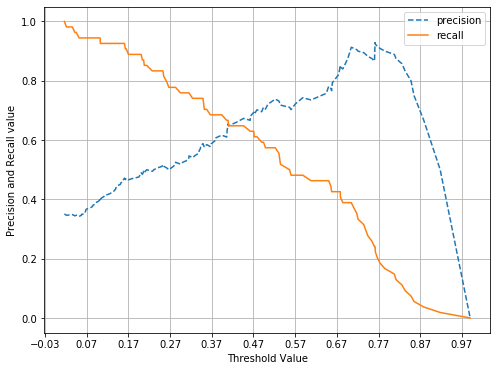

In [172]:
precision_recall_curve_plot(y_test, pred_proba)

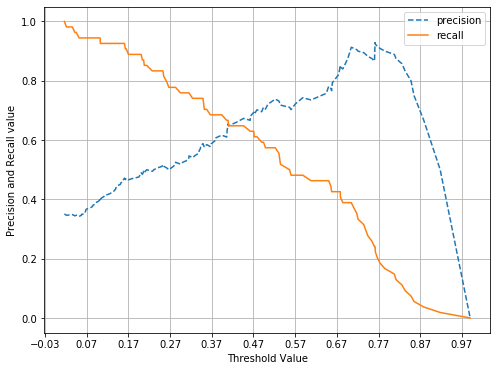

In [173]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [174]:
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 0.7이 채 안되는 낮은 수치들.

### describe를 한번 보자.

In [175]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

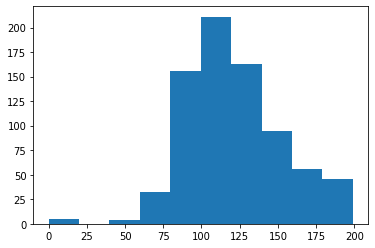

In [176]:
plt.hist(train['Glucose'], bins=10)

## 0값이 너무 많으므로 체크(preganacies 제외)

In [177]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = train['Glucose'].count()

for features in zero_features:
    zero_count = train[train[features] == 0][features].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(features, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [178]:
mean_zero_features = train[zero_features].mean()

In [179]:
mean_zero_features

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

In [180]:
train[zero_features] = train[zero_features].replace(0, mean_zero_features)

In [181]:
for features in zero_features:
    zero_count = train[train[features] == 0][features].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(features, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 0, 퍼센트는 0.00 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 0, 퍼센트는 0.00 %


### Insulin 값 예측해서 넣기

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
train['Insulin'].max()

846

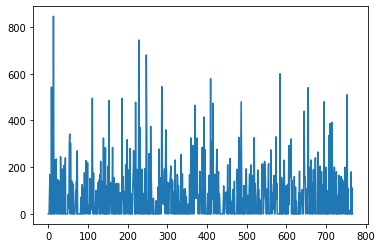

In [37]:
plt.plot(train['Insulin'])

In [22]:
train_I0 = train[train['Insulin'] == 0]
train_INot0 = train[train['Insulin'] != 0]

In [23]:
X_train = train_INot0.drop('Insulin', axis=1)
y_train = train_INot0['Insulin']

In [25]:
y_train = y_train.astype('str')

In [24]:
X_test = train_I0.drop('Insulin', axis=1)

In [27]:
rf_clf = RandomForestClassifier()

In [28]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
rf_clf.predict(X_test)

array(['168', '115', '326', '326', '85', '326', '155', '326', '326', '83',
       '156', '326', '326', '130', '326', '155', '190', '326', '105',
       '326', '215', '160', '326', '110', '326', '14', '326', '45', '210',
       '82', '36', '326', '82', '155', '49', '155', '100', '145', '326',
       '326', '37', '23', '49', '71', '326', '94', '182', '36', '116',
       '326', '105', '116', '36', '326', '120', '182', '182', '326',
       '115', '326', '36', '326', '326', '85', '54', '120', '326', '326',
       '326', '258', '71', '326', '326', '105', '258', '89', '49', '326',
       '53', '87', '326', '210', '155', '160', '326', '70', '85', '182',
       '326', '25', '326', '326', '155', '126', '49', '326', '130', '182',
       '168', '83', '49', '182', '105', '326', '116', '110', '326', '192',
       '55', '204', '100', '71', '326', '326', '83', '182', '194', '326',
       '326', '168', '120', '130', '82', '94', '326', '156', '326', '105',
       '326', '326', '210', '64', '94', '105', 

In [38]:
train_I0['Insulin'] = rf_clf.predict(X_test)

C:\Users\mo223\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
train.shape

(768, 9)

In [44]:
train_I0['Insulin'] = train_I0['Insulin'].astype('int64')

C:\Users\mo223\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
train = train_INot0.append(train_I0)

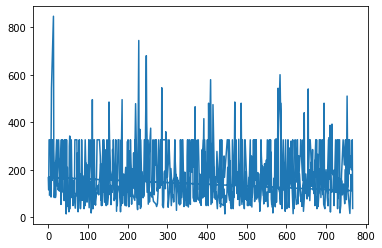

In [47]:
plt.plot(train['Insulin'])

In [18]:
train_G0 = train[train['Glucose'] == 0]
train_GNot0 = train[train['Glucose'] != 0]

In [19]:
train_G0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


## SkinThickness 값 예측해서 넣기

In [50]:
train_S0 = train[train['SkinThickness'] == 0]
train_SNot0 = train[train['SkinThickness'] != 0]

In [51]:
features = train.columns.difference(['SkinThickness'])
label = 'SkinThickness'

X_train = train_SNot0[features]
y_train = train_SNot0[label]

X_test = train_S0[features]

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 3 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [55]:
y_train = y_train.astype('str')

In [56]:
lr_clf.fit(X_train, y_train)

C:\Users\mo223\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
lr_clf.predict(X_test)

array(['33', '24', '40', '24', '32', '33', '33', '40', '33', '24', '33',
       '32', '23', '24', '33', '32', '33', '29', '33', '29', '99', '33',
       '32', '32', '32', '32', '32', '42', '99', '32', '19', '24', '30',
       '14', '17', '32', '24', '32', '24', '32', '40', '7', '24', '7',
       '32', '24', '24', '32', '29', '19', '32', '24', '31', '32', '24',
       '24', '32', '32', '24', '32', '33', '17', '33', '40', '23', '32',
       '24', '32', '29', '43', '32', '41', '32', '36', '15', '33', '33',
       '32', '24', '56', '32', '42', '27', '99', '24', '32', '7', '30',
       '33', '24', '29', '7', '42', '41', '17', '13', '33', '33', '42',
       '24', '43', '24', '33', '23', '32', '56', '32', '24', '41', '33',
       '33', '32', '33', '42', '42', '33', '19', '32', '33', '33', '29',
       '29', '33', '15', '99', '42', '17', '42', '33', '32', '33', '33',
       '99', '48', '18', '24', '40', '24', '33', '42', '33', '99', '33',
       '24', '32', '7', '7', '30', '32', '32', '99', '3

In [58]:
train_S0['SkinThickness'] = lr_clf.predict(X_test)

C:\Users\mo223\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
train_S0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,33,326,23.3,0.672,32,1
5,5,116,74,24,326,25.6,0.201,30,0
7,10,115,0,40,85,35.3,0.134,29,0
9,8,125,96,24,326,0.0,0.232,54,1
10,4,110,92,32,155,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,29,326,36.3,0.258,52,1
758,1,106,76,32,182,37.5,0.197,26,0
759,6,190,92,33,326,35.5,0.278,66,1
762,9,89,62,33,258,22.5,0.142,33,0


In [61]:
train_S0['SkinThickness'] = train_S0['SkinThickness'].astype('int64')

C:\Users\mo223\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
train_S0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 2 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               227 non-null    int64  
 1   Glucose                   227 non-null    int64  
 2   BloodPressure             227 non-null    int64  
 3   SkinThickness             227 non-null    int64  
 4   Insulin                   227 non-null    int64  
 5   BMI                       227 non-null    float64
 6   DiabetesPedigreeFunction  227 non-null    float64
 7   Age                       227 non-null    int64  
 8   Outcome                   227 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 17.7 KB


In [65]:
train = train_SNot0.append(train_S0)

In [66]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,30.054688,173.583333,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,12.509277,116.746031,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,23.000000,85.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.000000,144.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,258.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [67]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = train['Glucose'].count()

for features in zero_features:
    zero_count = train[train[features] == 0][features].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(features, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 11, 퍼센트는 1.43 %


## BloodPressure 예측

In [84]:
train_B0 = train[train['BloodPressure'] == 0]
train_BNot0 = train[train['BloodPressure'] != 0]

In [85]:
features = train.columns.difference(['BloodPressure'])
label = "BloodPressure"

X_train = train_BNot0[features]
y_train = train_BNot0[label]

X_test = train_B0[features]

In [91]:
y_train

3      66
4      40
6      50
8      70
13     60
       ..
619    70
643    70
697    70
703    78
706    70
Name: BloodPressure, Length: 768, dtype: int64

In [70]:
y_train = y_train.astype('str')

In [71]:
lr_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
lr_clf.predict(X_test)

array([74, 72, 70, 70, 70, 70, 64, 70, 74, 70, 70, 64, 64, 64, 70, 78, 70,
       70, 70, 70, 78, 70, 64, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 78,
       70], dtype=int64)

In [73]:
train_B0['BloodPressure'] = lr_clf.predict(X_test)

In [74]:
train_B0['BloodPressure'] = train_B0['BloodPressure'].astype('int64')

In [76]:
train = train_BNot0.append(train_B0)

In [77]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = train['Glucose'].count()

for features in zero_features:
    zero_count = train[train[features] == 0][features].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(features, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [93]:
train['BloodPressure'].value_counts()

70     81
74     54
64     48
78     48
68     45
72     45
80     40
76     39
60     37
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
98      3
100     3
106     3
108     2
104     2
46      2
55      2
30      2
40      1
38      1
122     1
61      1
114     1
95      1
102     1
24      1
Name: BloodPressure, dtype: int64

## BMI 예측

In [105]:
train_B0 = train[train['BMI'] == 0]
train_BNot0 = train[train['BMI'] != 0]

In [95]:
features = train.columns.difference(['BMI'])
label = "BMI"

X_train = train_BNot0[features]
y_train = train_BNot0[label]

X_test = train_B0[features]

In [96]:
y_train = y_train.astype('str')

In [97]:
lr_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
lr_clf.predict(X_test)

array(['36.5', '25.2', '31.2', '27.8', '34.2', '46.8', '46.8', '34.8',
       '34.8', '46.8', '46.8'], dtype=object)

In [99]:
train_B0['BMI'] = lr_clf.predict(X_test)

In [101]:
train_B0['BMI'] = train_B0['BMI'].astype('float64')

In [102]:
train = train_BNot0.append(train_B0)

In [103]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = train['Glucose'].count()

for features in zero_features:
    zero_count = train[train[features] == 0][features].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(features, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 0, 퍼센트는 0.00 %


## Glucose 예측

In [122]:
train_G0 = train[train['Glucose'] == 0]
train_GNot0 = train[train['Glucose'] != 0]

In [123]:
features = train.columns.difference(['Glucose'])
label = "Glucose"

X_train = train_GNot0[features]
y_train = train_GNot0[label]

X_test = train_G0[features]

In [124]:
X_test

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Insulin,Outcome,Pregnancies,SkinThickness
182,21,27.7,74,0.299,23,0,1,20
75,22,24.7,48,0.140,23,0,1,20
342,22,32.0,68,0.389,45,0,1,35
349,37,41.0,80,0.346,49,1,5,32
502,41,39.0,68,0.727,49,1,6,41


In [125]:
y_train = y_train.astype('str')

In [126]:
lr_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
lr_clf.predict(X_test)

array(['68', '88', '84', '88', '88'], dtype=object)

In [128]:
train_G0['Glucose'] = lr_clf.predict(X_test)

In [129]:
train_G0['Glucose'] = train_G0['Glucose'].astype('int64')

In [130]:
train = train_GNot0.append(train_G0)

In [131]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = train['Glucose'].count()

for features in zero_features:
    zero_count = train[train[features] == 0][features].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(features, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 0, 퍼센트는 0.00 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 0, 퍼센트는 0.00 %


In [132]:
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
182,1,68,74,20,23,27.7,0.299,21,0
75,1,88,48,20,23,24.7,0.140,22,0
342,1,84,68,35,45,32.0,0.389,22,0
349,5,88,80,32,49,41.0,0.346,37,1


## 본격 예측

In [182]:
features = train.columns.difference(['Outcome'])
label = 'Outcome'

X = train[features]
y = train[label]

In [183]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [184]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7
0,1.425995,0.167255,-0.021044,0.468492,0.865276,-0.417768,0.639947,0.872057
1,-0.190672,-0.851535,-0.516583,-0.365061,-1.205989,-0.417768,-0.844885,0.248678
2,-0.105584,-1.331821,-0.681762,0.604397,2.015979,-0.417768,1.233880,-0.630654
3,-1.041549,-0.633222,-0.516583,-0.920763,-1.074480,-0.265107,-0.844885,-0.374700
4,-0.020496,1.549899,-2.663916,5.484909,0.503626,0.530423,-1.141852,0.872057
...,...,...,...,...,...,...,...,...
763,2.532136,0.065376,0.309315,-0.908682,-0.679954,0.659428,1.827813,2.222711
764,-0.531023,0.632988,-0.186224,-0.398282,0.010468,-0.417768,-0.547919,0.040885
765,-0.275760,-0.909751,-0.021044,-0.685193,-0.022409,-0.071599,0.342981,-0.374700
766,1.170732,-0.342140,-1.012121,-0.371101,0.141977,-0.417768,-0.844885,-0.630654


In [185]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=156, stratify=y)

In [186]:
lr_reg = LogisticRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
pred_proba = lr_reg.predict_proba(X_test)

get_clf_eval(y_test, pred, pred_proba[:, 1])

오차행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC:0.8433


In [70]:
features = train.columns.difference(['Outcome'])
label = 'Outcome'

X = train[features]
y = train[label]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=37, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_reg = LogisticRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
pred_proba = lr_reg.predict_proba(X_test)

get_clf_eval(y_test, pred, pred_proba[:, 1])

오차행렬
[[82 18]
 [23 31]]
정확도: 0.7338, 정밀도: 0.6327, 재현율: 0.5741, F1: 0.6019, AUC:0.8154


In [198]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)
        thres.append(custom_threshold)

## 재현율 조정

In [203]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
pred_proba = lr_reg.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임곗값: 0.3
오차행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963, F1: 0.6615, AUC:0.8433
임곗값: 0.33
오차행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778, F1: 0.6774, AUC:0.8433
임곗값: 0.36
오차행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, F1: 0.6667, AUC:0.8433
임곗값: 0.39
오차행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1: 0.6667, AUC:0.8433
임곗값: 0.42
오차행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1: 0.6792, AUC:0.8433
임곗값: 0.45
오차행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1: 0.6857, AUC:0.8433
임곗값: 0.48
오차행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC:0.8433
임곗값: 0.5
오차행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC:0.8433


In [150]:
df = print_eval_df(thres, auc, pre, rec, f1_, roc)

             0.30      0.33      0.36      0.39      0.42      0.45      0.48  \
정확도      0.350649  0.350649  0.350649  0.350649  0.350649  0.350649  0.350649   
정밀도      0.350649  0.350649  0.350649  0.350649  0.350649  0.350649  0.350649   
재현율      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
F1       0.519231  0.519231  0.519231  0.519231  0.519231  0.519231  0.519231   
ROC AUC  0.481481  0.481481  0.481481  0.481481  0.481481  0.481481  0.481481   

             0.50  
정확도      0.350649  
정밀도      0.350649  
재현율      1.000000  
F1       0.519231  
ROC AUC  0.481481  


In [204]:
index = ['정확도', '정밀도', '재현율', 'F1', 'ROC AUC']
pd.DataFrame([auc, pre, rec, f1_, roc], index = index, columns = thres)

,0.30,0.33,0.36,0.39,0.42,0.45,0.48,0.50
정확도,0.714286,0.740260,0.746753,0.753247,0.779221,0.785714,0.798701,0.798701
정밀도,0.565789,0.600000,0.619048,0.633333,0.692308,0.705882,0.744681,0.767442
재현율,0.796296,0.777778,0.722222,0.703704,0.666667,0.666667,0.648148,0.611111
F1,0.661538,0.677419,0.666667,0.666667,0.679245,0.685714,0.693069,0.680412
ROC AUC,0.843333,0.843333,0.843333,0.843333,0.843333,0.843333,0.843333,0.843333


In [180]:
# 임곗값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

#위에서 구한 lr_reg의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

오차행렬
[[86 14]
 [24 30]]
정확도: 0.7532, 정밀도: 0.6818, 재현율: 0.5556, F1: 0.6122, AUC:0.8424


In [205]:
binarizer = Binarizer(threshold=0.45)

In [206]:
pred_th_045 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_045, pred_proba[:, 1])

오차행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1: 0.6857, AUC:0.8433
